# 이미지 변환
### data science stugy pf 185~
~~~
새로운 기저벡터에 대한 좌표변환을 이용하면 이미지를 자유롭게 변환할 수 있다.
파이썬에서는 scipy.ndimage 패키지의 affine_transformation() 명령을 사용한다.
이 명령은 이미지를 이루는 픽셀을 새로운 좌표로 이동

인수: 이미지 데이터와 변환행렬의 역행렬(책 184에 나오는 A로 표시한 행렬)을 받음
단 파이썬 이미지에서는 표준기저벡터를 사용, 원점이 왼쪽 상단의 점 유의
~~~

In [9]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
import scipy.misc
import scipy.ndimage

In [11]:
f=sp.misc.face(gray=True)   #gray=True는 흑백으로 이미지를 변환

e1=np.array([0, 1])
e2=np.array([1, 0])
E=np.vstack([e1, e2]).T         #vstack과 hstack는 각각 행과 열을 추가한다.
g1=np.array([1, 1])/np.sqrt(2)
g2=np.array([-1, 1])/np.sqrt(2)
A=np.vstack([g1, g2]).T
gc1=E@g1
gc2=E@g2

In [12]:
gray={'facecolor':'gray'}
black={'facecolor': 'black'}
red={'facecolor':'red'}
green={'facecolor':'green'}
blue={'facecolor':'blue'}
lightgreen={'facecolor':'lightgreen'}

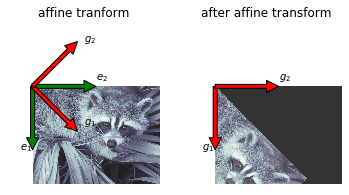

In [15]:
plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone, alpha=0.9)       #alpha는 투명도를 의미, cm는 colormap(색 그라데이션), f는 흑백으로 변환된 이미지

#xy는 방향 설정, xytext는 시작점
plt.annotate('', xy=500*e1, xytext=(0, 0), arrowprops=green)
plt.annotate('$e_1$', xy=500*e1, xytext=500*e1+[-100, 0])
plt.annotate('', xy=500*e2, xytext=(0, 0), arrowprops=green)
plt.annotate('$e_2$', xy=500*e2, xytext=500*e2+[0, -50])
plt.annotate('', xy=500*gc1, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_1$', xy=500*gc1, xytext=500*gc1+[50,-50])
plt.annotate('', xy=500*gc2, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_2$', xy=500*gc2, xytext=500*gc2+[50, 0])

plt.axis('off')         #죄표축 없앰
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title('affine tranform')


f1=sp.ndimage.affine_transform(f, A)

plt.subplot(122)
plt.imshow(f1, cmap=mpl.cm.bone, alpha=0.8)
plt.annotate('', xy=500*e1, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_1$', xy=500*e1, xytext=500*e1+[-100, 0])
plt.annotate('', xy=500*e2, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_2$', xy=500*e2, xytext=500*e2+[0, -50])

plt.axis('off')
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title('after affine transform')
plt.show()

### 연습문제 3.2.9 (pg 187)
~~~
다음 기저벡터를 이용하여 앞의 이미지를 변환하라. 변환한 이미지를 만들기 전에 어떤 이미지가 나올지 생각해보자

새로운 기저벡터에 대한 좌표변환을 응용하여 이미지를 자유롭게 변환할 때 sp.ndimage.affine_transform 사용

g1=[[1], [0.75]], g2=[[-1], [0.75]]
~~~

Text(0.5, 1.0, 'after affine transform')

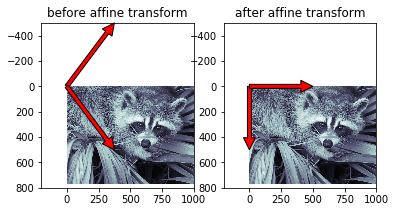

In [16]:
f=sp.misc.face(gray=True)

e1=np.array([0, -1])
e2=np.array([1, 0])
E=np.vstack([e1, e2]).T

g1=np.array([1, 0.75])
g2=np.array([-1, 0.75])
A=np.vstack([g1, g2]).T

f1=sp.ndimage.affine_transform(f, A)   #새로운 기저벡터에 대한 좌표변환

plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone)
plt.annotate('', xy=500*np.dot(E, g1), xytext=(0, 0), arrowprops=dict(facecolor='red'))
plt.annotate('', xy=500*np.dot(E, g2), xytext=(0, 0), arrowprops=dict(facecolor='red'))
plt.grid(False)

plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title('before affine transform')

plt.subplot(122)
plt.imshow(f, cmap=mpl.cm.bone)
plt.annotate('', xy=(0, 500), xytext=(0, 0), arrowprops=dict(facecolor='red'))
plt.annotate('', xy=(500, 0), xytext=(0, 0), arrowprops=dict(facecolor='red'))
plt.grid(False)

plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title('after affine transform')